## Import 

### Import Libraries

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# setting seaborn style
sns.set()

from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None) #Show all columns


## Import library that enables colours in Markdowns
from IPython.display import Markdown


import warnings
warnings.filterwarnings('ignore')


## Created functions

In [371]:
# Function to create plots  

def univariate_analysis(data, variable, target_variable='Claim Injury Type', figsize=(9, 6)):
    
    plt.figure(figsize=figsize)

    df_plot = data.copy()

    order = df_plot.groupby(variable)[target_variable].value_counts().unstack().sum(axis=1).sort_values(ascending=False).index

    sns.countplot(x=variable, hue=target_variable, data=df_plot, order=order)


    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Number of Tests by {target_variable} and {variable}')

    plt.tight_layout()
    plt.show()


## 1. Dataset overview

### Import Datasets

In [372]:
train_data = pd.read_csv("project_data/train_data.csv", low_memory=False)
test_data = pd.read_csv("project_data/test_data.csv")

### 1.1 Descriptive analysis

In [373]:
train_data.head()


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [374]:
test_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [375]:
test_data.columns.values

array(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date',
       'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'], dtype=object)

In [376]:
train_data.columns.values

array(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'], dtype=object)

In [377]:
# in the Train there is no Agreement Reach variable and WCB Decision becuase maybe it is the information that is know after defininig target variable

In [378]:
# set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [379]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
train_data.info()

## DATA TYPES:
# Convert accident date (to date type)
# convert age (to int)
# Alternative dispute resolution (??)
# Assembly date (to date type)
# birth year (to int)
# C2 date (to date type)
# C3 date (to date type)
# First hearing date (to date)
# IME-4 count (to int)
# Industry code (object)
# OIICS Nature of Injury Description (to object) - all nulls (relevant??)
# WCIO cause of injury code (float to object)
# WCIO Nature of Injury Code (float to object)
# WCIO Part Of Body Code (float to object)
# Agreement reached (??) - boolean/ int(???)
# Number of dependents (to int)

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [381]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  County of Injury        

## 2. Data Cleaning

### 2.1 Duplicates

In [382]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training data set.")
print(f"There are {duplicates_sum_test} in the test data set.")

There are 18350 in the training data set.
There are 2 in the test data set.


In [383]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

### 2.2 Target variable - Claim Injury Type Missing & Unique values

In [384]:
train_data["Claim Injury Type"].unique()

array(['2. NON-COMP', '4. TEMPORARY', nan, '3. MED ONLY',
       '5. PPD SCH LOSS', '6. PPD NSL', '1. CANCELLED', '8. DEATH',
       '7. PTD'], dtype=object)

In [385]:
train_data['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12476
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

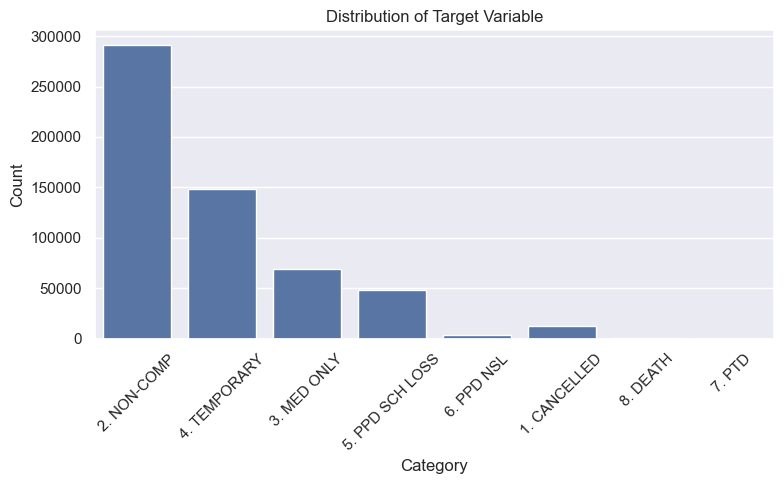

In [386]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Claim Injury Type', data=train_data)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.xticks(rotation=45)  


plt.tight_layout()  
plt.show()

In [387]:
missing_data_target = train_data[train_data['Claim Injury Type'].isna()]
missing_data_target.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaN,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
missing_data_target.info()
# all features with missing values on the target, are also missing, except Assembly Date -> not relevant (decision -> drop rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 957648180 to 208342104
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Accident Date                       0 non-null      object 
 1   Age at Injury                       0 non-null      float64
 2   Alternative Dispute Resolution      0 non-null      object 
 3   Assembly Date                       1096 non-null   object 
 4   Attorney/Representative             0 non-null      object 
 5   Average Weekly Wage                 0 non-null      float64
 6   Birth Year                          0 non-null      float64
 7   C-2 Date                            0 non-null      object 
 8   C-3 Date                            0 non-null      object 
 9   Carrier Name                        0 non-null      object 
 10  Carrier Type                        0 non-null      object 
 11  Claim Injury Type                  

In [389]:
train_data= train_data.drop(missing_data_target.index)

Re chack for unique values in the target variable

In [390]:
train_data["Claim Injury Type"].unique().tolist()

['2. NON-COMP',
 '4. TEMPORARY',
 '3. MED ONLY',
 '5. PPD SCH LOSS',
 '6. PPD NSL',
 '1. CANCELLED',
 '8. DEATH',
 '7. PTD']

### 2.3 All independent variables - Missing & Unique Values

#### All listed Variables - summary 

1. **Accident Date**: 0.64% NaN and dates (5539 unique values)

2. **Age at Injury**: 0% NaN and no strange values (108 unique values) (there are some values >100)
3. **Alternative Dispute Resolution**: 0% NaN and no strange values (3 unique values)
4. **Assembly Date**: 0% NaN and dates (897 unique values)
5. **Attorney/Representative**: 0% NaN and no strange values (2 unique values)
6. **Average Weekly Wage**: around 5% NaN and a lot of unique values (120024 unique values)
7. **Birth Year**: 5% Nan and one 25081 strange values "0" (Birth Year cannot be 0) (107 unique values - 0 included)
8. **C-2 Date**: 2.5% NaN and dataes (2475 unique values)
11. **Carrier Name**: 0% NaN and name of carrier (2046 unique values) 
12. **Carrier Type**: 0% NaN and no strange values (8 unique values)
13. **Claim Injury Type** - target variable
14. **County of Injury**: 0% NaN and there are 1196 "UNKNOWN" values (63 unique values)
15. **COVID-19 Indicator**: 0% NaN and no strange values (2 unique values)
16. **District Name**: 0% NaN and no strange values (8 unique values)
17. **First Hearing Date**: 73.7% NaN and dates (1094 unique values)
18. **Gender**: 0% NaN and male, female, non-binary and unspecified (4 unique values)
19. **Industry Code**: 1.73% NaN and no strange values (24 unique values)
20. **Industry Code Description**: 1.73% NaN and descripion (20 unique values)
21. **Medical Fee Region**: 0% NaN and one strange value 'UK' (33472 such values) other are numbers (4 unique values)
22. **WCIO Cause of Injury Code**: 2.724% NaN and no strange values (77 unique values) 
23. **WCIO Cause of Injury Description**: 2.724% NaN and no strange values (74 unique values)
24. **WCIO Nature of Injury Code**: 2.727% NaN and no strange values (56 unique values)
25. **WCIO Nature of Injury Description**: 2.727% NaN and no strange values (56 unique values)
26. **WCIO Part Of Body Code**: 2.98% NaN and 42011 "-9" values (should be treated as missing value) (57 unique values)
27. **WCIO Part Of Body Description**: 2.98% NaN andone strange value: INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED (54 unique values)
28. **Zip Code**: 4.98% NaN and zip code is a bit strange -> it has a lot of unique values, some zip codes starts with numbers and there are som that starts with letters; one zip code unique value is 'UNKNO". According to definition of Zip-Code: zip codes only contain a combination of numeric values.
29. **Agreement Reached**: 0% NaN and no strange values (2 unique values)
30. **WCB Decision**: 0% NaN and only 1 unique value -> variable that should be deleted it is not informative
31. **Number of Dependents**: 0% NaN and no strange values (7 unique values)



##### a) Checking unique values in each of the variable (looking for some values that can indicate missing values)

In [391]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    unique_values_num = train_data[column].nunique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}':")
    print(unique_values_num)
    
    print()

Unique values in 'Accident Date':
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Number of unique values in 'Accident Date':
5539

Unique values in 'Age at Injury':
[ 31.  46.  40.  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.  54.
  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.  58.
  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.  27.
  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.  68.
  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.  87.
  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.  14.
 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.  93.
 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Number of unique values in 'Age at Injury':
108

Unique values in 'Alternative Dispute Resolution':
['N' 'Y' 'U']
Number of unique values in 'Alternative Dispute Resolution':
3

Unique values in 'Assembly Date':
['2020-01-01' '2020-01-02' '2020-01-

After reviewing unique values in the dataset we also found in some variables unique values such as e.g "UNKNOWN", "UK", "UNKNO". Also, we saw 
Therefore, we changed that values to missing values.

In [392]:
# Filling missing values with NaN

train_data.replace('UNKNOWN', np.nan, inplace = True)
test_data.replace('UNKNOWN', np.nan, inplace = True)

train_data.replace('UK', np.nan, inplace = True)
test_data.replace('UK', np.nan, inplace = True)

train_data.replace('UNKNO', np.nan, inplace = True)
test_data.replace('UNKNO', np.nan, inplace = True)


# There are such strange values in the gender U and X
train_data['Gender'].replace('X', np.nan, inplace = True)
test_data['Gender'].replace('X', np.nan, inplace = True)

train_data['Gender'].replace('U', np.nan, inplace = True)
test_data['Gender'].replace('U', np.nan, inplace = True)


# We also looked deeper into ZipCode variable and it has several zipcode that are not valid zipcodes. Those values are: ".1605", "00000" and "99999"
train_data['Zip Code'].replace([".1605", "00000", "99999"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999"], np.nan, inplace=True)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code 

In [393]:
train_data["Zip Code"].value_counts(dropna=False).sort_index()

Zip Code
00011        1
00601        1
00603        3
00623        2
00624        1
00627        1
00641        1
00656        2
00659        3
00660        1
00662        5
00669        1
00677        4
00678        1
00680        2
00685        1
00692        1
00698        1
00726        1
00727        1
00730        1
00731        1
00735        1
00737        1
00738        2
00739        1
00749        1
00751        2
00754        1
00757        1
00767        2
00772        1
00775        1
00780        1
00783        1
00791        5
00801        1
00817        1
00824        2
00857        2
00859        1
00901        1
00912        1
00925        1
00926        1
00927        1
00952        1
00956        1
00962        1
00968        1
00979        2
00982        1
01001        1
01002        4
01007        1
01013        2
01020        2
01027        1
01031        1
01034        1
01040        3
01056        3
01057        1
01060        3
01062        1
01075        1
0

In [394]:
# Creating new variable zip_code dividied into categories 
def categorize_zip(zip_code):
    if pd.isna(zip_code):  # Check if the value is NaN
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"


# Apply the function to create the new 'zip_code_cat' column
train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

# If you want to see the distribution of the new category
print(train_data['zip_code_cat'].value_counts(dropna=False))


zip_code_cat
1        518206
NaN       28734
0         18278
3          3551
2          2061
7           743
9           708
4           517
8           454
Other       330
6           247
5           196
Name: count, dtype: int64


There is also strange value in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [395]:
# Display only rows where "WCIO Part Of Body Code" equals -9
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]

# Display the result
filtered_data_train["WCIO Part Of Body Description"].value_counts()

# Display only rows where "WCIO Part Of Body Code" equals -9
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]

# Display the result
filtered_data_test["WCIO Part Of Body Description"].value_counts()


WCIO Part Of Body Description
MULTIPLE    67465
Name: count, dtype: int64

In [396]:
# columns_to_plot =['Gender', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type','COVID-19 Indicator','District Name','Medical Fee Region', 'Agreement Reached','Number of Dependents' ]
# for hue_variable in columns_to_plot:
#         univariate_analysis(train_data, hue_variable )

##### b) Checking the number of missing values in each variable in the train_data (number and percentage)

In [397]:
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values)

OIICS Nature of Injury Description    574025
IME-4 Count                           441222
First Hearing Date                    423228
C-3 Date                              386781
Medical Fee Region                     33472
Birth Year                             29078
zip_code_cat                           28734
Zip Code                               28734
Average Weekly Wage                    28651
WCIO Part Of Body Code                 17081
WCIO Part Of Body Description          17081
WCIO Nature of Injury Code             15656
WCIO Nature of Injury Description      15656
WCIO Cause of Injury Description       15639
WCIO Cause of Injury Code              15639
C-2 Date                               14559
Industry Code                           9957
Industry Code Description               9957
Gender                                  4757
Accident Date                           3688
Carrier Type                            1774
County of Injury                        1196
Age at Inj

In [398]:
missing_percentage = ((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False)
print(missing_percentage)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.864596
First Hearing Date                     73.729890
C-3 Date                               67.380515
Medical Fee Region                      5.831105
Birth Year                              5.065633
zip_code_cat                            5.005705
Zip Code                                5.005705
Average Weekly Wage                     4.991246
WCIO Part Of Body Code                  2.975654
WCIO Part Of Body Description           2.975654
WCIO Nature of Injury Code              2.727407
WCIO Nature of Injury Description       2.727407
WCIO Cause of Injury Description        2.724446
WCIO Cause of Injury Code               2.724446
C-2 Date                                2.536301
Industry Code                           1.734593
Industry Code Description               1.734593
Gender                                  0.828710
Accident Date                           0.642481
Carrier Type        

Variables such as ***OIICS Nature of Injury Descritpion, IME-4 Count, First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> We decided to drop ***OIICS Nature of Injury Descritpion, IME-4 Count and ***C-3 Date*** becuase they have so many missing values that it does not make sense to impute them (not enough information for taking that as sample for the whole population).
<br> We do not drop ***First Hearing Date*** variable, because blank date (missing value) means the claim has not yet had a hearing held. Thus, it is an information that we want to keep.




In [399]:
columns_to_drop = ['IME-4 Count','C-3 Date', 'OIICS Nature of Injury Description']

train_data =train_data.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)


We decided to drop variavle WCB Decision, because it only contains one unique value, so it is not informative.

In [400]:
train_data =train_data.drop('WCB Decision', axis =1)

We decided to change vairable First Hearing Date to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearings has been already held.

In [401]:
train_data['First Hearing Date Binary'] = train_data['First Hearing Date'].notna().astype(int)
train_data[['First Hearing Date', 'First Hearing Date Binary']].head()

,First Hearing Date,First Hearing Date Binary
Claim Identifier,,
5393875,NaN,0
5393091,2020-02-21,1
5393889,NaN,0
5393887,NaN,0
5393863,NaN,0


In [402]:
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)
test_data[['First Hearing Date', 'First Hearing Date Binary']].head()

,First Hearing Date,First Hearing Date Binary
Claim Identifier,,
6165911,NaN,0
6166141,NaN,0
6165907,NaN,0
6166047,NaN,0
6166102,NaN,0


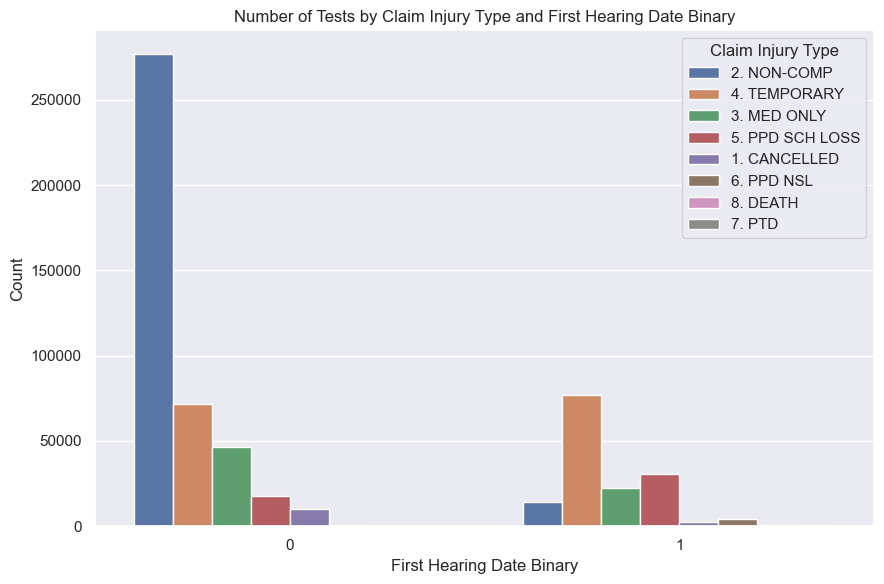

In [403]:
univariate_analysis(train_data, 'First Hearing Date Binary')

First Hearing Data variable can be droped after creating binary variable.

In [404]:
train_data =train_data.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [405]:
WCIO_columns = [
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'WCIO Nature of Injury Description', 
    'WCIO Nature of Injury Code', 
    'WCIO Cause of Injury Description', 
    'WCIO Cause of Injury Code'
]

# Display rows where all WCIO columns contain NaN values
WCIO_nan_rows = train_data[train_data[WCIO_columns].isna().all(axis=1)]

count_all_nan_WCIO = train_data[WCIO_columns].isna().all(axis=1).sum()
print("Rows with all NaN values in WCIO columns:", count_all_nan_WCIO)


# Calculate the percentage of these rows in the whole dataset
percentage_all_nan_WCIO = (count_all_nan_WCIO / len(train_data)) * 100

# Display the result
print(f"Percentage of rows with all NaN values in WCIO columns: {percentage_all_nan_WCIO:.2f}%")
WCIO_nan_rows.head()


Rows with all NaN values in WCIO columns: 14763
Percentage of rows with all NaN values in WCIO columns: 2.57%


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,zip_code_cat,First Hearing Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaN,STATE INSURANCE FUND,2A. SIF,...,NaN,NaN,NaN,NaN,NaN,11411,0.0,4.0,1,0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaN,CHARTER OAK FIRE INS CO,1A. PRIVATE,...,NaN,NaN,NaN,NaN,NaN,07621,0.0,5.0,0,1
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaN,STATE INSURANCE FUND,2A. SIF,...,NaN,NaN,NaN,NaN,NaN,12306,0.0,5.0,1,0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,...,NaN,NaN,NaN,NaN,NaN,11801,0.0,1.0,1,0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaN,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,...,NaN,NaN,NaN,NaN,NaN,12150,0.0,3.0,1,0


Dropping rows where all WCIO columns contain NaN values.

In [406]:
train_data = train_data[~train_data[WCIO_columns].isna().all(axis=1)]

In [407]:
missing_percentage = ((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Medical Fee Region                   5.748469
Birth Year                           5.062028
zip_code_cat                         5.004273
Zip Code                             5.004273
Average Weekly Wage                  4.989254
Gender                               0.839142
WCIO Part Of Body Description        0.414475
WCIO Part Of Body Code               0.414475
Accident Date                        0.378356
Industry Code Description            0.259270
Industry Code                        0.259270
County of Injury                     0.206522
WCIO Nature of Injury Description    0.159675
WCIO Nature of Injury Code           0.159675
WCIO Cause of Injury Description     0.156635
WCIO Cause of Injury Code            0.156635
Carrier Type                         0.099238
C-2 Date                             0.002682
dtype: float64


### Splitting into training and validation set

In [408]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [409]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)


#### After splitiing into training and validation set we can deal with all missing values

Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill -9 those values with mode amonog codes that corresponds to multiple. We used mode to replace -9 becuase WCIO Part of Body Code is a categorical variable.

In [410]:
# Define the valid codes for "Multiple"
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode, leaving other NaN values unchanged
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


print(X_train["WCIO Part Of Body Code"].value_counts(dropna=False))

WCIO Part Of Body Code
90.0    45039
42.0    36285
53.0    33437
38.0    26518
36.0    25282
35.0    22019
55.0    17439
34.0    13214
56.0    13184
33.0    10749
60.0     9877
18.0     9634
14.0     9169
37.0     8680
54.0     8142
31.0     7872
91.0     7656
32.0     7050
41.0     5696
10.0     5605
11.0     5533
44.0     5347
61.0     4732
51.0     4480
66.0     4303
25.0     4160
65.0     3741
52.0     3014
19.0     2784
13.0     2731
48.0     2591
20.0     1986
39.0     1824
30.0     1813
57.0     1759
NaN      1589
15.0     1467
12.0     1386
63.0     1382
50.0     1354
43.0     1321
58.0     1273
40.0     1218
17.0     1116
21.0      953
99.0      880
62.0      807
22.0      775
16.0      569
46.0      500
49.0      448
23.0      344
47.0      282
45.0      280
24.0      104
26.0       52
64.0       38
Name: count, dtype: int64


Checking the percentage of misssing values after deleting WCIO rows

##### Dealing with remaning missing values

1. There is a chance that ***Birth Year*** is correlated with Age at the Injury, so we do not take care of missing values for now.

2. All missing values in the variable ***Average Weekly Wage*** are replaced by using median (it is a continous variable)

In [411]:
median_wage = X_train["Average Weekly Wage"].median()
X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)

X_val["Average Weekly Wage"].fillna(median_wage, inplace=True)
test_data["Average Weekly Wage"].fillna(median_wage, inplace=True)


3. Replacing missing values in ***zip_code_cat*** with mode - categorical variable

In [412]:
mode_value = X_train['zip_code_cat'].mode()[0]  

# Replace NaN values in 'zip_code_cat' with the mode
X_train['zip_code_cat'].fillna(mode_value, inplace=True)
X_val['zip_code_cat'].fillna(mode_value, inplace=True)
test_data['zip_code_cat'].fillna(mode_value, inplace=True)

# Display the updated DataFrame and the distribution of the new category
X_train['zip_code_cat'].value_counts(dropna=False)  # Include NaN if still any 

zip_code_cat
1        373320
0         12164
3          2415
2          1403
7           502
9           498
4           349
8           312
Other       230
6           171
5           119
Name: count, dtype: int64

4. Variables that has less than 1% of with missing values

In [413]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'County of Injury'
]

In [414]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

In [415]:
X_train =X_train.drop('Zip Code', axis=1)
X_val = X_val.drop('Zip Code', axis=1)
test_data = test_data.drop('Zip Code', axis=1)

In [416]:
X_train.isna().sum().sort_values(ascending=False)

Birth Year                           19784
Accident Date                            0
Industry Code                            0
zip_code_cat                             0
Number of Dependents                     0
Agreement Reached                        0
WCIO Part Of Body Description            0
WCIO Part Of Body Code                   0
WCIO Nature of Injury Description        0
WCIO Nature of Injury Code               0
WCIO Cause of Injury Description         0
WCIO Cause of Injury Code                0
Medical Fee Region                       0
Industry Code Description                0
Gender                                   0
Age at Injury                            0
District Name                            0
COVID-19 Indicator                       0
County of Injury                         0
Carrier Type                             0
Carrier Name                             0
C-2 Date                                 0
Average Weekly Wage                      0
Attorney/Re

In [417]:
X_val.isna().sum().sort_values(ascending=False)

Birth Year                           8526
Accident Date                           0
Industry Code                           0
zip_code_cat                            0
Number of Dependents                    0
Agreement Reached                       0
WCIO Part Of Body Description           0
WCIO Part Of Body Code                  0
WCIO Nature of Injury Description       0
WCIO Nature of Injury Code              0
WCIO Cause of Injury Description        0
WCIO Cause of Injury Code               0
Medical Fee Region                      0
Industry Code Description               0
Gender                                  0
Age at Injury                           0
District Name                           0
COVID-19 Indicator                      0
County of Injury                        0
Carrier Type                            0
Carrier Name                            0
C-2 Date                                0
Average Weekly Wage                     0
Attorney/Representative           

In [418]:
test_data.isna().sum().sort_values(ascending=False)

Birth Year                           19470
Accident Date                            0
Industry Code                            0
zip_code_cat                             0
Number of Dependents                     0
WCIO Part Of Body Description            0
WCIO Part Of Body Code                   0
WCIO Nature of Injury Description        0
WCIO Nature of Injury Code               0
WCIO Cause of Injury Description         0
WCIO Cause of Injury Code                0
Medical Fee Region                       0
Industry Code Description                0
Gender                                   0
Age at Injury                            0
District Name                            0
COVID-19 Indicator                       0
County of Injury                         0
Carrier Type                             0
Carrier Name                             0
C-2 Date                                 0
Average Weekly Wage                      0
Attorney/Representative                  0
Assembly Da

## 3. Data visualisation

## 4. Data Transformation

In [419]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559262 entries, 5393875 to 6165075
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Accident Date                      557146 non-null  object 
 1   Age at Injury                      559262 non-null  float64
 2   Alternative Dispute Resolution     559262 non-null  object 
 3   Assembly Date                      559262 non-null  object 
 4   Attorney/Representative            559262 non-null  object 
 5   Average Weekly Wage                531359 non-null  float64
 6   Birth Year                         530952 non-null  float64
 7   C-2 Date                           559247 non-null  object 
 8   Carrier Name                       559262 non-null  object 
 9   Carrier Type                       558707 non-null  object 
 10  Claim Injury Type                  559262 non-null  object 
 11  County of Injury                   55

In [420]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

In [421]:
train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

In [422]:
train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

In [423]:
train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

In [424]:
train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

In [425]:
train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

In [426]:
train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

In [427]:
train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'], format = '%Y-%m-%d')
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'], format = '%Y-%m-%d')

In [428]:
train_data["Assembly Date"] = pd.to_datetime(train_data['C-2 Date'], format = '%Y-%m-%d')
test_data["Assembly Date"] = pd.to_datetime(test_data['C-2 Date'], format = '%Y-%m-%d')

In [429]:
train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'], format = '%Y-%m-%d')
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'], format = '%Y-%m-%d')

In [430]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559262 entries, 5393875 to 6165075
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      557146 non-null  datetime64[ns]
 1   Age at Injury                      559262 non-null  Int64         
 2   Alternative Dispute Resolution     559262 non-null  object        
 3   Assembly Date                      559247 non-null  datetime64[ns]
 4   Attorney/Representative            559262 non-null  object        
 5   Average Weekly Wage                531359 non-null  float64       
 6   Birth Year                         530952 non-null  Int64         
 7   C-2 Date                           559247 non-null  datetime64[ns]
 8   Carrier Name                       559262 non-null  object        
 9   Carrier Type                       558707 non-null  object        
 10  Claim Injury Type 

In [431]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387973 entries, 6165911 to 6553594
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      387973 non-null  datetime64[ns]
 1   Age at Injury                      387973 non-null  Int64         
 2   Alternative Dispute Resolution     387973 non-null  object        
 3   Assembly Date                      387973 non-null  datetime64[ns]
 4   Attorney/Representative            387973 non-null  object        
 5   Average Weekly Wage                387973 non-null  float64       
 6   Birth Year                         368503 non-null  Int64         
 7   C-2 Date                           387973 non-null  datetime64[ns]
 8   Carrier Name                       387973 non-null  object        
 9   Carrier Type                       387973 non-null  object        
 10  County of Injury  

In [432]:
#### Convert birth year into age:

In [433]:
train_data["Birth Year"]= datetime.now().year - train_data["Birth Year"]

#### Dates analysis:

In [434]:
train_data["Days Between Accident_Assembly"] = train_data['Assembly Date'] - train_data['Accident Date']
print(f"maximum days between assembly: {train_data['Days Between Accident_Assembly'].max()}")
print(f"minimum days between assembly: {train_data['Days Between Accident_Assembly'].min()}") 
# strange values assembly date < accident date?? 
# #same max & min as days between accident and C2.

maximum days between assembly: 21503 days 00:00:00
minimum days between assembly: -8842 days +00:00:00


In [435]:
train_data["Days Between Accident_C2"] = train_data['C-2 Date'] - train_data['Accident Date']
print(f"maximum days between assembly: {train_data['Days Between Accident_C2'].max()}")
print(f"minimum days between assembly: {train_data['Days Between Accident_C2'].min()}") 
# strange values C2 date < accident date?? 
# #same max & min as days between accident and C2.

maximum days between assembly: 21503 days 00:00:00
minimum days between assembly: -8842 days +00:00:00


In [436]:
# train_data["Days Between Accident_C3"] = train_data['C-3 Date'] - train_data['Accident Date']
# print(f"maximum days between assembly: {train_data['Days Between Accident_C3'].max()}")
# print(f"minimum days between assembly: {train_data['Days Between Accident_C3'].min()}")
# # strange values C3 date < accident date?? 

In [437]:
# train_data["Days Between Accident_1st_Hearing"] = train_data['First Hearing Date'] - train_data['Accident Date']
# print(f"maximum days between assembly: {train_data["Days Between Accident_1st_Hearing"].max()}")
# print(f"minimum days between assembly: {train_data["Days Between Accident_1st_Hearing"].min()}")
# # strange values 1st_Hearing < accident date?? 

#### Group descriptions by code: 

In [438]:
group_by_industry = train_data.groupby("Industry Code")["Industry Code Description"].unique()
group_by_industry

# Different codes with same description

Industry Code
11                      [AGRICULTURE, FORESTRY, FISHING AND HUNTING]
21                                                          [MINING]
22                                                       [UTILITIES]
23                                                    [CONSTRUCTION]
31                                                   [MANUFACTURING]
32                                                   [MANUFACTURING]
33                                                   [MANUFACTURING]
42                                                 [WHOLESALE TRADE]
44                                                    [RETAIL TRADE]
45                                                    [RETAIL TRADE]
48                                  [TRANSPORTATION AND WAREHOUSING]
49                                  [TRANSPORTATION AND WAREHOUSING]
51                                                     [INFORMATION]
52                                           [FINANCE AND INSURANCE]
53                  

In [439]:
group_by_injury = train_data.groupby("WCIO Cause of Injury Code")["WCIO Cause of Injury Description"].unique()
group_by_injury

# Different codes with same description

WCIO Cause of Injury Code
1                                       [CHEMICALS]
2                       [HOT OBJECTS OR SUBSTANCES]
3                            [TEMPERATURE EXTREMES]
4                                   [FIRE OR FLAME]
5                             [STEAM OR HOT FLUIDS]
6                    [DUST, GASES, FUMES OR VAPORS]
7                               [WELDING OPERATION]
8                                       [RADIATION]
9                               [CONTACT WITH, NOC]
10                           [MACHINE OR MACHINERY]
11                     [COLD OBJECTS OR SUBSTANCES]
12                                 [OBJECT HANDLED]
13               [CAUGHT IN, UNDER OR BETWEEN, NOC]
14                          [ABNORMAL AIR PRESSURE]
15                                   [BROKEN GLASS]
16                [HAND TOOL, UTENSIL; NOT POWERED]
17                 [OBJECT BEING LIFTED OR HANDLED]
18                   [POWERED HAND TOOL, APPLIANCE]
19                     [CUT, PUNCTURE,

In [440]:
group_by_body_part = train_data.groupby("WCIO Part Of Body Code")["WCIO Part Of Body Description"].unique()
group_by_body_part

# different codes with the same description

WCIO Part Of Body Code
-9                                                 [MULTIPLE]
10                                     [MULTIPLE HEAD INJURY]
11                                                    [SKULL]
12                                                    [BRAIN]
13                                                   [EAR(S)]
14                                                   [EYE(S)]
15                                                     [NOSE]
16                                                    [TEETH]
17                                                    [MOUTH]
18                                              [SOFT TISSUE]
19                                             [FACIAL BONES]
20                                     [MULTIPLE NECK INJURY]
21                                                [VERTEBRAE]
22                                                     [DISC]
23                                              [SPINAL CORD]
24                                             

## 5. Defining target variable

In [441]:
x = train_data.drop('Claim Injury Type', axis = 1) # axis=1 means the operation must be done on columns
y = train_data['Claim Injury Type'] 

In [442]:
### Define metric & non-metric features
metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number_of_Dependents", "Days Between Accident_Assembly", "Days Between Accident_C2", 
                   "Days Between Accident_C3", "Days Between Accident_1st_Hearing"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description", "Zip Code", "Agreement Reached", "WCB Decision"]

